<a href="https://colab.research.google.com/github/edwinapalmer/edwinapalmer.github.io/blob/master/DS_Unit_1_Build_Edwina_Palmer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
absenteeism_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip'

In [3]:
!wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip'

--2020-05-01 17:46:02--  http://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66136 (65K) [application/x-httpd-php]
Saving to: ‘Absenteeism_at_work_AAA.zip’

Absenteeism_at_work 100%[===================>]  64.59K   256KB/s    in 0.3s    

2020-05-01 17:46:02 (256 KB/s) - ‘Absenteeism_at_work_AAA.zip’ saved [66136/66136]



In [4]:
!unzip Absenteeism_at_work_AAA.zip

Archive:  Absenteeism_at_work_AAA.zip
  inflating: Absenteeism_at_work.arff  
  inflating: Absenteeism_at_work.csv  
  inflating: Absenteeism_at_work.xls  
  inflating: Attribute Information.docx  
  inflating: UCI_ABS_TEXT.docx       


### My question for this project is which factors causes absenteeism in the workplace, how does it relate to the present day situation dealing with COVID-19, and which age group has the highest rate of absenteeism.

In [5]:
# Load the absenteeism dataset from its URL:
import pandas as pd
# Read in the CSV

absent = pd.read_csv('Absenteeism_at_work.csv', index_col=None, na_values=['NA'],sep=';')

print(absent.shape)
absent.head()

(740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [6]:
# To clean the data 

# Check for missing values

absent.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [0]:
# to strip / from work load average/day

absent.columns = absent.columns.str.replace('/', ' per ').str.strip()

In [8]:
# To get data types

print(absent.dtypes)

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average per day          float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object


In [9]:
# To get the stats of the data
absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### I want to look at how age affects absenteeism using a bar chart

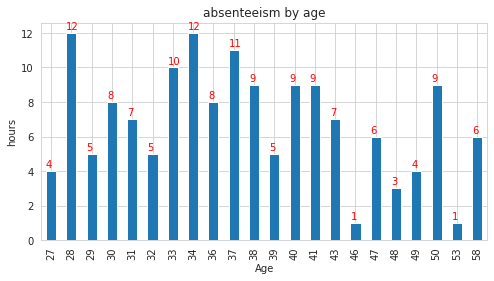

In [10]:
# To get data visualisations

# Count of absenteeism by age

age_count = absent.groupby(['Age']).agg({'Absenteeism time in hours': pd.Series.nunique})
ax = age_count.plot(kind='bar', figsize=(8,4), legend=False)
for i, v in enumerate(age_count.values):
    ax.text(i-.25, v +0.2, str(v[0]), color='red')
ax.set_xlabel('Age')
ax.set_ylabel('hours')
ax.set_title('absenteeism by age')
plt.show()

### It seems that age plays a significant role on absenteeism. Lets explore the causes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


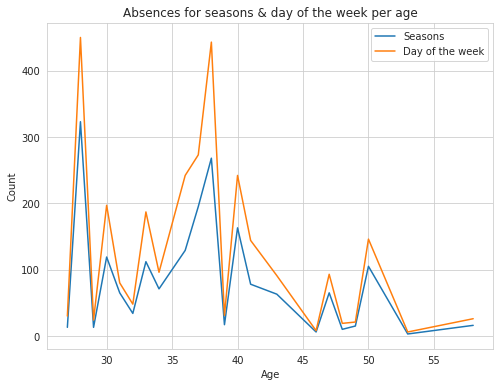

In [11]:
# Seasons & days of the week absences by age

ax = absent.groupby('Age')['Seasons', 'Day of the week'].sum().plot(figsize=(8,6))
ax.set_ylabel('Count')
ax.set_title('Absences for seasons & day of the week per age')
plt.show()

### The distribution for absences per seasons and day of week is highest for age 36 to 38. 

In [12]:
# To get the count of the reasons for absence

absent['Reason for absence'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

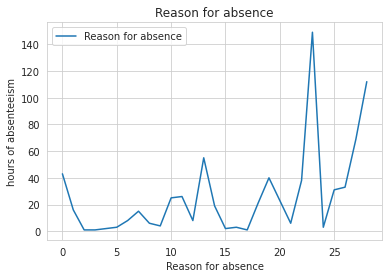

In [13]:
# To line plot reasons for absence

absent['Reason for absence'].value_counts().sort_index().plot();

plt.xlabel('Reason for absence')
plt.ylabel('hours of absenteeism')
plt.title('Reason for absence')
plt.legend()
plt.show()


From the reasons listed below, medical consultations, dental appointments, and physiotherapy are the top three reasons for absences.



### **Reasons for absenteeism:**

1. Individual identification (ID) 
2. Reason for absence (ICD). 
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows: 

I Certain infectious and parasitic diseases 

II Neoplasms 

III Diseases of the blood and blood-forming organs and certain disorders 
involving the immune mechanism 

IV Endocrine, nutritional and metabolic diseases 

V Mental and behavioural disorders 

VI Diseases of the nervous system 

VII Diseases of the eye and adnexa 

VIII Diseases of the ear and mastoid process 

IX Diseases of the circulatory system

X Diseases of the respiratory system

XI Diseases of the digestive system 

XII Diseases of the skin and subcutaneous tissue 

XIII Diseases of the musculoskeletal system and connective tissue 

XIV Diseases of the genitourinary system 

XV Pregnancy, childbirth and the puerperium 

XVI Certain conditions originating in the perinatal period 

XVII Congenital malformations, deformations and chromosomal abnormalities 

XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified 

XIX Injury, poisoning and certain other consequences of external causes

XX External causes of morbidity and mortality 

XXI Factors influencing health status and contact with health services. 

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28). 
3. Month of absence 
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)) 
5. Seasons (summer (1), autumn (2), winter (3), spring (4)) 
6. Transportation expense 
7. Distance from Residence to Work (kilometers) 
8. Service time 
9. Age 
10. Work load Average/day 
11. Hit target 
12. Disciplinary failure (yes=1; no=0) 
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)) 
14. Son (number of children) 
15. Social drinker (yes=1; no=0) 
16. Social smoker (yes=1; no=0) 
17. Pet (number of pet) 
18. Weight 
19. Height 
20. Body mass index 
21. Absenteeism time in hours (target) 

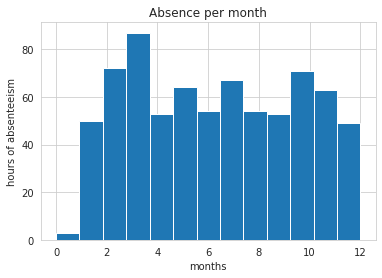

In [14]:
# To see hours of absenteeism per month

absent['Month of absence'].hist(bins=13); 

plt.xlabel('months')
plt.ylabel('hours of absenteeism')
plt.title('Absence per month')
plt.show()

### The data reveals absenteeism is highest March. It's also high in february and then picks up again in July, October. Lowest in January.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


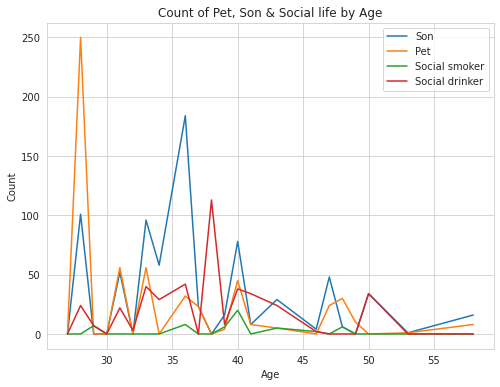

In [15]:
# To plot for employees with children and pets

ax = absent.groupby('Age')['Son', 'Pet','Social smoker', 'Social drinker'].sum().plot(figsize=(8,6))
ax.set_ylabel('Count')
ax.set_title('Count of Pet, Son & Social life by Age')
plt.show()

### The age group with the highest number of employees with son is around 36 to 37. The age group with the highest pet owners is about 28. This seems to lend to my assertion that people around the age group of late 20's, mid 30's to 40's may have a high rate of absenteeism because of family commitments. Social drinkers peaked at about age 38. There's not a high rate of social smokers at any age.